<h1>About the model and dataset</h1>
<br/>
We are going to make a classification model using keras deep neural network model. The dataset to be used is keras MNIST dataset which contains approximately 60000 training hand written digits images and approximately 10000 hand written digit images for testing.

In [1]:
# Importing necessary packages and libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

**Let us see what is inside the dataset**

In [9]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

In [10]:
print("The shape of x_train is: {}".format(x_train.shape))
print("The shape of x_test is: {}".format(x_test.shape))
print("The shape of y_train is: {}".format(y_train.shape))
print("The shape of y_test is: {}".format(y_test.shape))

The shape of x_train is: (60000, 28, 28)
The shape of x_test is: (10000, 28, 28)
The shape of y_train is: (60000,)
The shape of y_test is: (10000,)


So, the dataset contains 60000 entries for training and each entry is 28x28 array which means each entry is a 28x28 pixel image.</br>
<br>
The data for testing contains 10000 images of size 28x28 pixel.

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

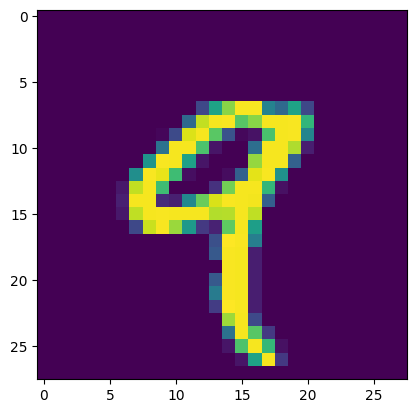

In [14]:
plt.imshow(x_train[4])
plt.show()

In [17]:
x_train.shape

(60000, 28, 28)

We can see that each training dataset is basically a three dimensional array therefore we cannot put it in model in this form because the model accepts a 1 dimensional vecotor as trainaing input. <br>
So, we first reshape each image in 1 dimensional vector.

> Add blockquote



In [16]:
input_dim = x_train[0].shape[0]*x_train[0].shape[1]
print(input_dim)

784


In [18]:
x_train = x_train.reshape(x_train.shape[0],input_dim).astype("float32")

In [19]:
x_train.shape

(60000, 784)

In [20]:
x_train[0].shape

(784,)

*It is perfectly done.*
Now we will do the same also for testing dataset.

In [21]:
x_test = x_test.reshape(x_test.shape[0],input_dim).astype("float32")

In [22]:
x_test.shape

(10000, 784)

In [23]:
x_test[0].shape

(784,)

In [24]:
x_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

We can see from the above cell that the pixel values range from from 0 to 255. So, we have to normalize the pixel values to range from 0 to 1 so that the model can be trained on evenly distributed data.

In [25]:
x_train = x_train/255
x_test = x_test/255

In [26]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Let us see for the dependent variable setting which is y.

In [27]:
y_train.shape

(60000,)

In [30]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

We have ten types of digits in y_trian as well as y_test datasets.
<br> Therefore, we cannot inputs the y_train as it is. We have to make categorical arrays for each image. For doing so, we are going use keras build in to_categorical method.

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
y_train.shape

(60000, 10)

In [33]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

As we have preprocessed the data therefore, now it is time to make the model.

<h1>Building the Model</h1>

In [34]:
def classification_nn():
  input_neurons = x_train.shape[1]
  output_neurons = y_train.shape[1]
  model = Sequential()
  model.add(Dense(input_neurons, activation = 'relu', input_shape=(input_neurons,)))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(output_neurons, activation = 'softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Now fitting and predicting the data into the model.

In [35]:
model = classification_nn()
model.fit(x_train, y_train, validation_data= (x_test,y_test),epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 21s - loss: 0.1901 - accuracy: 0.9423 - val_loss: 0.1171 - val_accuracy: 0.9621 - 21s/epoch - 11ms/step
Epoch 2/10
1875/1875 - 19s - loss: 0.0811 - accuracy: 0.9749 - val_loss: 0.0787 - val_accuracy: 0.9756 - 19s/epoch - 10ms/step
Epoch 3/10
1875/1875 - 20s - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0852 - val_accuracy: 0.9740 - 20s/epoch - 10ms/step
Epoch 4/10
1875/1875 - 20s - loss: 0.0405 - accuracy: 0.9868 - val_loss: 0.0704 - val_accuracy: 0.9816 - 20s/epoch - 10ms/step
Epoch 5/10
1875/1875 - 20s - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0697 - val_accuracy: 0.9805 - 20s/epoch - 11ms/step
Epoch 6/10
1875/1875 - 18s - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0779 - val_accuracy: 0.9797 - 18s/epoch - 10ms/step
Epoch 7/10
1875/1875 - 20s - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0862 - val_accuracy: 0.9775 - 20s/epoch - 10ms/step
Epoch 8/10
1875/1875 - 20s - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0864 - val_accuracy: 0.9808 - 20s/ep

Let us evaluate the model accuracy.

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1071157231926918
Test accuracy: 0.9799000024795532


The model is performing well with almost 98% accuracy.

In [37]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [41]:
print(f"prediction 1: {predictions[0]}\n")
print(f"original value for prediction 1: {y_test[0]}")

prediction 1: [9.4400560e-15 8.2359559e-09 8.7679499e-09 6.2825536e-09 3.2216055e-10
 3.9148269e-13 6.2879673e-18 9.9999732e-01 2.7642944e-12 2.6130992e-06]

original value for prediction 1: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [42]:
print(f"prediction 2: {predictions[70]}\n")
print(f"original value for prediction 1: {y_test[70]}")

prediction 2: [7.4946539e-16 4.3842772e-12 1.4695854e-07 4.3848709e-12 2.5253306e-12
 3.9908086e-17 4.0427993e-24 9.9999982e-01 2.2038369e-21 5.2675698e-08]

original value for prediction 1: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


**Since the model is performing very well, therefore let us save it.**

In [44]:
model.save("image_classification_model_with_keras_on_mnist.keras")